# pothole object detection

- library: ultralytics
- GPU: Colab A100

In [1]:
!wget https://www.dropbox.com/s/qvglw8pqo16769f/pothole_dataset_v8.zip?dl=1 -O pothole_dataset_v8.zip

--2025-04-29 10:19:24--  https://www.dropbox.com/s/qvglw8pqo16769f/pothole_dataset_v8.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/em7irx9n0ukb2g8jw9kx0/pothole_dataset_v8.zip?rlkey=launc4guu0wvvib144y8mt4n7&dl=1 [following]
--2025-04-29 10:19:25--  https://www.dropbox.com/scl/fi/em7irx9n0ukb2g8jw9kx0/pothole_dataset_v8.zip?rlkey=launc4guu0wvvib144y8mt4n7&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc61ee93ce023198fcb80a63cacd.dl.dropboxusercontent.com/cd/0/inline/CovgLT1feibenIgf2ZWQRwZAy7ETKjEun5syK654SvXqgWAoS5W3LmcU2-o_p4tZT8pFA6wgrbgkTwHxPh7YhCE2k3lrLFRpQ11sYgab9fAt8hAzFNDh_4p-eqhc3masWqU-4AVajehYbuAeePTXyvOP/file?dl=1# [following]
--2025-04-29 10:19:25--  https://uc61ee93ce02319

In [2]:
!pwd

/content


In [3]:
!unzip -q "pothole_dataset_v8.zip" -d "/content/pothole_dataset_v8"

In [4]:
%cd pothole_dataset_v8/pothole_dataset_v8/

/content/pothole_dataset_v8/pothole_dataset_v8


In [5]:
%pwd

'/content/pothole_dataset_v8/pothole_dataset_v8'

In [6]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [7]:
from ultralytics import YOLO



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
# Load a COCO-pretrained YOLO12n model
model = YOLO("yolo12n.pt")


100%|██████████| 5.34M/5.34M [00:00<00:00, 298MB/s]


pothole.yaml
```
path: /content/pothole_dataset_v8/pothole_dataset_v8
train: train/images
val: valid/images

nc: 1

# Classes
names: ['pothole']
```


In [9]:
results = model.train(data="pothole.yaml", epochs=100, imgsz=512)

Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolo12n.pt, data=pothole.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=

100%|██████████| 755k/755k [00:00<00:00, 146MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics

YOLOv12n summary: 272 layers, 2,568,243 parameters, 2,568,227 gradients, 6.5 GFLOPs

Transferred 640/691 items from pretrained weights
Freezing layer 'model.21.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 350MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1785.2±1074.6 MB/s, size: 79.3 KB)


train: Scanning /content/pothole_dataset_v8/pothole_dataset_v8/train/labels... 6960 images, 10 backgrounds, 0 corrupt: 100%|██████████| 6962/6962 [00:04<00:00, 1569.34it/s]

train: /content/pothole_dataset_v8/pothole_dataset_v8/train/images/G0012012.jpg: 2 duplicate labels removed
train: /content/pothole_dataset_v8/pothole_dataset_v8/train/images/G0052120.jpg: 1 duplicate labels removed
train: /content/pothole_dataset_v8/pothole_dataset_v8/train/images/G0063926.jpg: 1 duplicate labels removed
train: /content/pothole_dataset_v8/pothole_dataset_v8/train/images/G0063927.jpg: 1 duplicate labels removed
train: /content/pothole_dataset_v8/pothole_dataset_v8/train/images/G0064103.jpg: 2 duplicate labels removed
train: /content/pothole_dataset_v8/pothole_dataset_v8/train/images/G0064146.jpg: 1 duplicate labels removed
train: /content/pothole_dataset_v8/pothole_dataset_v8/train/images/G0064186.jpg: 1 duplicate labels removed
train: /content/pothole_dataset_v8/pothole_dataset_v8/train/images/G0064187.jpg: 1 duplicate labels removed
train: /content/pothole_dataset_v8/pothole_dataset_v8/train/images/G0064409.jpg: 4 duplicate labels removed
train: /content/pothole_data

train: New cache created: /content/pothole_dataset_v8/pothole_dataset_v8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1679.8±1421.6 MB/s, size: 359.7 KB)


val: Scanning /content/pothole_dataset_v8/pothole_dataset_v8/valid/labels... 271 images, 0 backgrounds, 0 corrupt: 100%|██████████| 271/271 [00:00<00:00, 1292.45it/s]

val: /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/G0011603.jpg: 1 duplicate labels removed
val: /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/G0011614.jpg: 1 duplicate labels removed
val: /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/G0011616.jpg: 2 duplicate labels removed
val: /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/G0011661.jpg: 1 duplicate labels removed
val: /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/G0011662.jpg: 1 duplicate labels removed
val: /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/G0011664.jpg: 1 duplicate labels removed
val: /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/G0011677.jpg: 1 duplicate labels removed
val: /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/G0011678.jpg: 1 duplicate labels removed
val: /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/G0011705.jpg: 1 duplicate labels removed
val: /content/pothole_dataset_v8/pothole_datas

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.91G      2.189      3.271      1.552          5        512: 100%|██████████| 436/436 [01:05<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.12it/s]


                   all        271        716      0.248      0.103     0.0687     0.0217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.93G      2.244      2.625      1.544          0        512: 100%|██████████| 436/436 [00:58<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.61it/s]

                   all        271        716      0.152     0.0517     0.0235     0.0102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.94G      2.402      2.554      1.661          1        512: 100%|██████████| 436/436 [00:56<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.56it/s]

                   all        271        716     0.0895     0.0433     0.0174    0.00542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.95G      2.424      2.505      1.711          4        512: 100%|██████████| 436/436 [00:56<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.99it/s]

                   all        271        716      0.192      0.095     0.0548     0.0206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.96G      2.367      2.377      1.679         10        512: 100%|██████████| 436/436 [00:56<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.69it/s]

                   all        271        716      0.137     0.0768     0.0302    0.00821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.96G      2.309       2.27      1.642          8        512: 100%|██████████| 436/436 [00:56<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.77it/s]

                   all        271        716      0.182      0.103     0.0583     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.97G      2.253      2.213      1.612          6        512: 100%|██████████| 436/436 [00:56<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.66it/s]

                   all        271        716      0.342      0.169      0.139     0.0481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.98G      2.247      2.179        1.6          9        512: 100%|██████████| 436/436 [00:56<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.75it/s]

                   all        271        716      0.293       0.17      0.135     0.0499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.99G      2.176      2.086      1.567          3        512: 100%|██████████| 436/436 [00:56<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.76it/s]

                   all        271        716      0.311      0.159      0.137     0.0465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         2G      2.162      2.019      1.535          2        512: 100%|██████████| 436/436 [00:56<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.81it/s]

                   all        271        716      0.308      0.203      0.157     0.0618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.02G      2.147      2.004      1.538          7        512: 100%|██████████| 436/436 [00:57<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.58it/s]

                   all        271        716      0.276      0.163      0.118     0.0403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.02G      2.147      2.005      1.535          1        512: 100%|██████████| 436/436 [00:58<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.63it/s]

                   all        271        716      0.361      0.189       0.17     0.0622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.04G      2.107      1.954      1.505         13        512: 100%|██████████| 436/436 [00:57<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.73it/s]

                   all        271        716      0.378      0.142      0.142     0.0528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.04G      2.104      1.914      1.503          9        512: 100%|██████████| 436/436 [00:57<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.74it/s]

                   all        271        716      0.369      0.165      0.175     0.0675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.05G      2.082      1.886      1.494          5        512: 100%|██████████| 436/436 [00:57<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.77it/s]

                   all        271        716      0.311      0.148       0.12     0.0466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.06G      2.058      1.874      1.484          7        512: 100%|██████████| 436/436 [00:56<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.76it/s]

                   all        271        716      0.362      0.217      0.189     0.0645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.07G      2.072      1.854      1.493          8        512: 100%|██████████| 436/436 [00:56<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.77it/s]

                   all        271        716      0.361       0.17      0.143     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.08G      2.019      1.822      1.473          3        512: 100%|██████████| 436/436 [00:55<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.28it/s]

                   all        271        716      0.346      0.239        0.2     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.09G      2.031      1.833      1.474          2        512: 100%|██████████| 436/436 [00:55<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.71it/s]

                   all        271        716      0.289      0.216      0.165     0.0575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.1G      2.036      1.829      1.459          5        512: 100%|██████████| 436/436 [00:55<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.96it/s]

                   all        271        716      0.409      0.237      0.216     0.0802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.11G      2.025      1.784      1.456          2        512: 100%|██████████| 436/436 [00:56<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.91it/s]

                   all        271        716      0.252      0.128     0.0938      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.12G      2.008      1.779      1.448          7        512: 100%|██████████| 436/436 [00:55<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.79it/s]

                   all        271        716      0.476      0.219       0.23     0.0868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.13G      2.013      1.766      1.458          2        512: 100%|██████████| 436/436 [00:55<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.98it/s]

                   all        271        716      0.381       0.24      0.205     0.0684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.14G      1.997      1.757      1.449          3        512: 100%|██████████| 436/436 [00:55<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.69it/s]

                   all        271        716      0.312      0.187      0.156     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.15G       1.98      1.724      1.433         14        512: 100%|██████████| 436/436 [00:55<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.46it/s]

                   all        271        716      0.352      0.236      0.194     0.0694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.16G      1.979       1.74      1.422          6        512: 100%|██████████| 436/436 [00:55<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.71it/s]

                   all        271        716      0.362      0.215      0.182     0.0678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.17G      1.985      1.735      1.431         10        512: 100%|██████████| 436/436 [00:55<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.86it/s]

                   all        271        716      0.413      0.258      0.238     0.0837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.18G      1.973       1.71      1.417          8        512: 100%|██████████| 436/436 [00:55<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.02it/s]

                   all        271        716      0.392      0.209      0.165     0.0606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.19G      1.961      1.721      1.423          2        512: 100%|██████████| 436/436 [00:55<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.82it/s]

                   all        271        716      0.401      0.251       0.24     0.0875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.2G       1.96      1.671      1.409          3        512: 100%|██████████| 436/436 [00:56<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.59it/s]

                   all        271        716      0.403      0.244      0.221     0.0806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.21G       1.96      1.685      1.409          9        512: 100%|██████████| 436/436 [00:56<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.75it/s]

                   all        271        716      0.394      0.242      0.221     0.0804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.22G      1.926       1.65      1.397          3        512: 100%|██████████| 436/436 [00:55<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.95it/s]

                   all        271        716      0.427      0.251      0.242     0.0869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.23G      1.943      1.682      1.415          6        512: 100%|██████████| 436/436 [00:56<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.84it/s]

                   all        271        716       0.38      0.239      0.219     0.0857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.24G      1.929      1.647      1.395          2        512: 100%|██████████| 436/436 [00:56<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.74it/s]

                   all        271        716      0.515      0.267      0.278      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.25G      1.945      1.648      1.404          6        512: 100%|██████████| 436/436 [00:56<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.39it/s]

                   all        271        716      0.503      0.271      0.264     0.0955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.26G      1.918       1.63      1.397          4        512: 100%|██████████| 436/436 [00:56<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.43it/s]

                   all        271        716      0.446       0.27      0.264      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.27G      1.922      1.611      1.383          4        512: 100%|██████████| 436/436 [00:56<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.49it/s]

                   all        271        716      0.476      0.229      0.239       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.28G      1.922      1.632      1.393          3        512: 100%|██████████| 436/436 [00:56<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.68it/s]

                   all        271        716      0.464      0.263      0.255     0.0998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.29G      1.912      1.605      1.387          1        512: 100%|██████████| 436/436 [00:56<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.75it/s]

                   all        271        716      0.423       0.27      0.254     0.0971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.3G      1.909      1.604      1.387          2        512: 100%|██████████| 436/436 [00:56<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.68it/s]

                   all        271        716      0.409      0.267      0.252     0.0923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.31G      1.888        1.6       1.37          0        512: 100%|██████████| 436/436 [00:56<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.79it/s]

                   all        271        716      0.467       0.25      0.248     0.0946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.32G      1.903       1.59      1.377          5        512: 100%|██████████| 436/436 [00:56<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.95it/s]

                   all        271        716      0.429      0.277      0.249     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.33G      1.901      1.578      1.377          6        512: 100%|██████████| 436/436 [00:56<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.72it/s]

                   all        271        716      0.482      0.247      0.251     0.0998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.34G      1.874      1.564      1.367          1        512: 100%|██████████| 436/436 [00:56<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.83it/s]

                   all        271        716      0.411      0.277      0.268      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.35G      1.891       1.57      1.381          7        512: 100%|██████████| 436/436 [00:56<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.82it/s]

                   all        271        716      0.482      0.237      0.257     0.0993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.36G      1.884      1.556      1.364          9        512: 100%|██████████| 436/436 [00:57<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.72it/s]

                   all        271        716      0.446      0.285      0.269     0.0979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.37G      1.877      1.548      1.366         10        512: 100%|██████████| 436/436 [00:56<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.83it/s]

                   all        271        716      0.424      0.249      0.242     0.0905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.38G      1.865      1.547      1.358          7        512: 100%|██████████| 436/436 [00:56<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.63it/s]

                   all        271        716      0.446      0.267      0.264     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.39G      1.878      1.526      1.356          5        512: 100%|██████████| 436/436 [00:56<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.73it/s]

                   all        271        716      0.451       0.25      0.235     0.0858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.4G      1.847      1.531      1.361          3        512: 100%|██████████| 436/436 [00:57<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.62it/s]

                   all        271        716      0.472      0.275      0.278      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.41G      1.859      1.537      1.359          4        512: 100%|██████████| 436/436 [00:57<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.71it/s]

                   all        271        716      0.379      0.265      0.226     0.0845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.42G       1.85      1.518      1.354          6        512: 100%|██████████| 436/436 [00:56<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.77it/s]

                   all        271        716      0.403      0.259      0.239     0.0942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.43G      1.833      1.488      1.346          2        512: 100%|██████████| 436/436 [00:57<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.68it/s]

                   all        271        716      0.433      0.254      0.255     0.0998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.44G      1.839      1.491      1.339          2        512: 100%|██████████| 436/436 [00:56<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.53it/s]

                   all        271        716      0.424      0.281      0.268      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.45G      1.843      1.478      1.338          4        512: 100%|██████████| 436/436 [00:56<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.44it/s]

                   all        271        716      0.504       0.24      0.262      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.46G      1.835      1.488      1.346         15        512: 100%|██████████| 436/436 [00:57<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.14it/s]

                   all        271        716      0.468      0.245      0.241     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.47G      1.823      1.492      1.341         13        512: 100%|██████████| 436/436 [00:57<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.31it/s]

                   all        271        716      0.453      0.267      0.268      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.48G      1.824      1.461      1.326         11        512: 100%|██████████| 436/436 [00:57<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.51it/s]

                   all        271        716      0.466      0.275      0.257     0.0995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.49G      1.817      1.462      1.329          3        512: 100%|██████████| 436/436 [00:57<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.41it/s]

                   all        271        716      0.511      0.288      0.301      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       2.5G      1.816      1.464      1.334          7        512: 100%|██████████| 436/436 [00:57<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.46it/s]

                   all        271        716      0.489      0.272      0.277      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.51G      1.809       1.46      1.326          7        512: 100%|██████████| 436/436 [00:57<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.57it/s]

                   all        271        716      0.485      0.254      0.266      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.52G      1.805      1.425      1.316          7        512: 100%|██████████| 436/436 [00:57<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.56it/s]

                   all        271        716      0.448      0.263      0.261      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.53G        1.8      1.445      1.318         12        512: 100%|██████████| 436/436 [00:57<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.67it/s]

                   all        271        716      0.485      0.257      0.259        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.54G      1.797      1.431      1.312          2        512: 100%|██████████| 436/436 [00:56<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.42it/s]

                   all        271        716      0.463      0.285      0.293      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.55G      1.781      1.403      1.305          2        512: 100%|██████████| 436/436 [00:56<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.34it/s]

                   all        271        716      0.432      0.261      0.248        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.56G      1.781      1.412      1.311          8        512: 100%|██████████| 436/436 [00:56<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.48it/s]

                   all        271        716      0.498      0.277      0.286      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.57G      1.775      1.402      1.304          3        512: 100%|██████████| 436/436 [00:56<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.73it/s]

                   all        271        716      0.426      0.274      0.255     0.0978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.58G      1.782      1.405      1.312          6        512: 100%|██████████| 436/436 [00:57<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.76it/s]

                   all        271        716      0.469      0.278       0.28      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.59G      1.765      1.397      1.302          4        512: 100%|██████████| 436/436 [00:56<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.69it/s]

                   all        271        716      0.498      0.275      0.284      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.6G      1.762      1.381      1.296          4        512: 100%|██████████| 436/436 [00:56<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.62it/s]

                   all        271        716      0.445      0.302      0.293      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.61G      1.761      1.381      1.307         21        512: 100%|██████████| 436/436 [00:57<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.72it/s]

                   all        271        716       0.46      0.295      0.281      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.62G      1.752      1.357      1.295          2        512: 100%|██████████| 436/436 [00:56<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.67it/s]

                   all        271        716      0.413      0.272      0.264      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.63G      1.767      1.379        1.3          3        512: 100%|██████████| 436/436 [00:57<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.62it/s]

                   all        271        716      0.397      0.267      0.246     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.64G      1.758      1.366      1.299          5        512: 100%|██████████| 436/436 [00:57<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.67it/s]

                   all        271        716      0.425      0.285      0.282      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.65G      1.743      1.344      1.283          9        512: 100%|██████████| 436/436 [00:57<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.77it/s]

                   all        271        716      0.467      0.271      0.273      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.66G      1.735      1.334      1.277          4        512: 100%|██████████| 436/436 [00:57<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.54it/s]

                   all        271        716      0.445       0.27      0.264      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.67G      1.758      1.364      1.295          5        512: 100%|██████████| 436/436 [00:57<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.46it/s]

                   all        271        716       0.42      0.265      0.261      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.68G      1.742      1.339       1.28          7        512: 100%|██████████| 436/436 [00:57<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.76it/s]

                   all        271        716      0.434      0.275      0.273      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.69G       1.73      1.328      1.279         15        512: 100%|██████████| 436/436 [00:57<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.73it/s]

                   all        271        716      0.418      0.284      0.252     0.0968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       2.7G      1.738      1.336       1.28          6        512: 100%|██████████| 436/436 [00:57<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.71it/s]

                   all        271        716      0.429      0.274      0.243     0.0961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.71G      1.729      1.324      1.271          2        512: 100%|██████████| 436/436 [00:57<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.70it/s]

                   all        271        716      0.475      0.268      0.265      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.72G      1.737      1.324      1.279          2        512: 100%|██████████| 436/436 [00:57<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.94it/s]

                   all        271        716      0.488      0.277      0.274      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.73G      1.707      1.279      1.266          3        512: 100%|██████████| 436/436 [00:57<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.70it/s]

                   all        271        716      0.438      0.277      0.271      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.74G      1.709      1.293       1.27          9        512: 100%|██████████| 436/436 [00:57<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.73it/s]

                   all        271        716      0.465      0.272       0.28      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.75G       1.71      1.293       1.27          2        512: 100%|██████████| 436/436 [00:56<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.59it/s]

                   all        271        716      0.446      0.273      0.278      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.76G        1.7       1.28       1.26          4        512: 100%|██████████| 436/436 [00:57<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.75it/s]

                   all        271        716      0.433      0.278       0.27      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.77G      1.712      1.285      1.263         13        512: 100%|██████████| 436/436 [00:57<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.52it/s]

                   all        271        716      0.435      0.271      0.264      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.78G      1.692      1.272      1.258          2        512: 100%|██████████| 436/436 [00:57<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.67it/s]

                   all        271        716      0.454      0.272      0.271      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.79G      1.702      1.278      1.258          1        512: 100%|██████████| 436/436 [00:57<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.61it/s]

                   all        271        716       0.45      0.265      0.266      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.8G      1.671      1.254      1.255          6        512: 100%|██████████| 436/436 [00:57<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.78it/s]

                   all        271        716      0.453      0.272      0.267      0.103


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.81G      1.699      1.233      1.273          5        512: 100%|██████████| 436/436 [00:58<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.65it/s]

                   all        271        716      0.428      0.272      0.261      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.82G      1.664      1.203      1.263          3        512: 100%|██████████| 436/436 [00:57<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.31it/s]

                   all        271        716      0.458      0.258      0.263      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.83G      1.662      1.188      1.266          5        512: 100%|██████████| 436/436 [00:57<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.57it/s]

                   all        271        716      0.438       0.27      0.266      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.84G      1.657       1.18      1.261          5        512: 100%|██████████| 436/436 [00:56<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.66it/s]

                   all        271        716      0.451      0.268      0.264      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.85G      1.657      1.165      1.251          2        512: 100%|██████████| 436/436 [00:57<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.52it/s]

                   all        271        716      0.468      0.267      0.264      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.86G      1.649      1.167      1.247          2        512: 100%|██████████| 436/436 [00:56<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.70it/s]

                   all        271        716      0.468      0.267      0.266      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.87G      1.641      1.152       1.25          2        512: 100%|██████████| 436/436 [00:57<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.43it/s]

                   all        271        716       0.45      0.279       0.27      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.88G      1.637      1.148       1.24          3        512: 100%|██████████| 436/436 [00:57<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.64it/s]

                   all        271        716      0.449      0.277      0.266      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.88G       1.63       1.13       1.24          2        512: 100%|██████████| 436/436 [00:57<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.56it/s]

                   all        271        716       0.46      0.275      0.266      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.9G       1.62      1.129      1.243          5        512: 100%|██████████| 436/436 [00:56<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.62it/s]

                   all        271        716      0.477      0.274      0.272      0.104



100 epochs completed in 1.624 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  5.96it/s]


                   all        271        716      0.523      0.284      0.298      0.116
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


In [33]:
results = model("./valid/images/img-156_jpg.rf.7de75186c4dfad8e1880d129b8a9126f.jpg")


image 1/1 /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/img-156_jpg.rf.7de75186c4dfad8e1880d129b8a9126f.jpg: 288x512 1 pothole, 18.3ms
Speed: 3.0ms preprocess, 18.3ms inference, 2.4ms postprocess per image at shape (1, 3, 288, 512)


In [32]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def show_result(results):
  results_img = results[0].plot()
  results_img = cv2.cvtColor(results_img, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(10, 8))
  plt.imshow(results_img)
  plt.axis('off')
  plt.show()

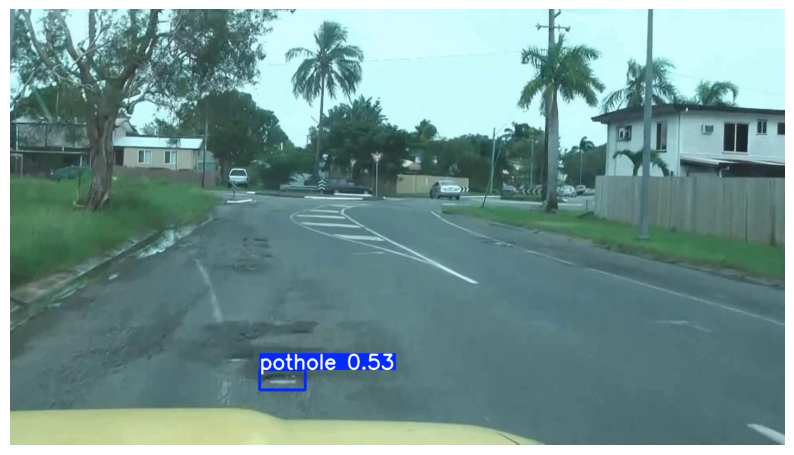

In [34]:
show_result(results)

In [35]:
results = model("./valid/images/img-161_jpg.rf.11a2bbe3c4fa2f48e02a2ffa07dc1022.jpg")


image 1/1 /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/img-161_jpg.rf.11a2bbe3c4fa2f48e02a2ffa07dc1022.jpg: 288x512 1 pothole, 16.3ms
Speed: 1.8ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 288, 512)


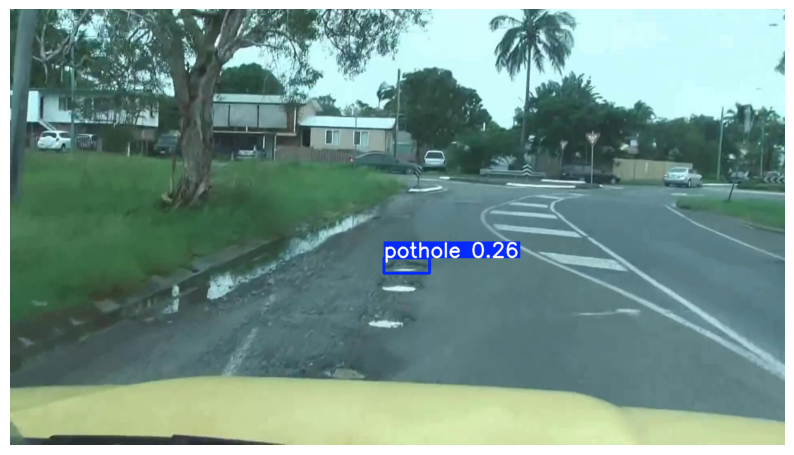

In [36]:
show_result(results)


image 1/1 /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/G0011474.jpg: 288x512 1 pothole, 15.3ms
Speed: 1.8ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 512)


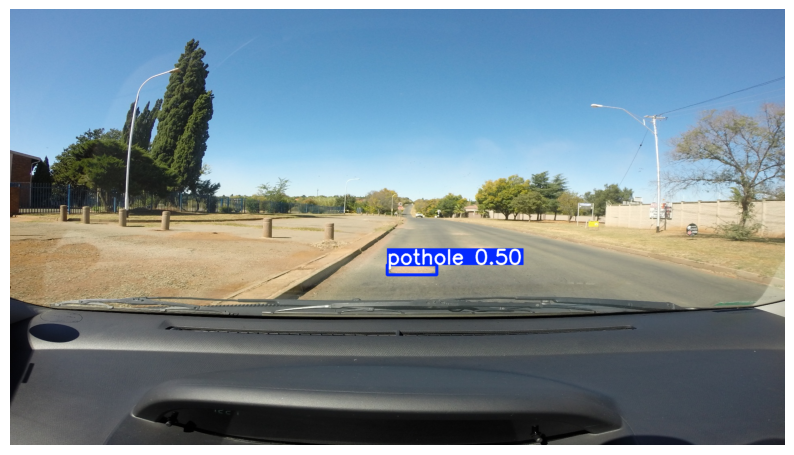

In [37]:
results = model("./valid/images/G0011474.jpg")
show_result(results)


image 1/1 /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/G0011475.jpg: 288x512 1 pothole, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 1.8ms postprocess per image at shape (1, 3, 288, 512)


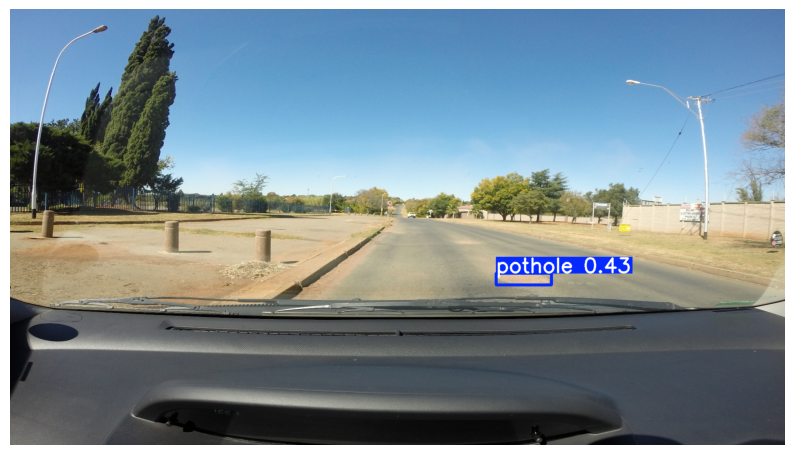

In [38]:
results = model("./valid/images/G0011475.jpg")
show_result(results)


image 1/1 /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/G0011773.jpg: 288x512 2 potholes, 17.3ms
Speed: 2.8ms preprocess, 17.3ms inference, 2.3ms postprocess per image at shape (1, 3, 288, 512)


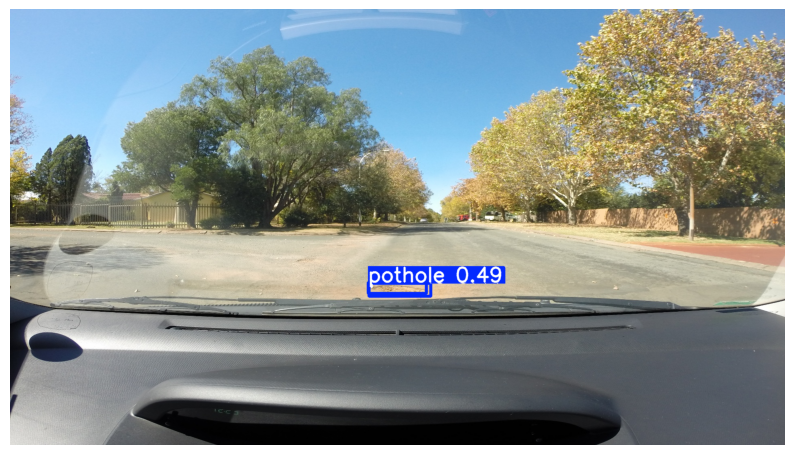

In [39]:
results = model("./valid/images/G0011773.jpg")
show_result(results)


image 1/1 /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/G0011989.jpg: 288x512 2 potholes, 16.9ms
Speed: 2.8ms preprocess, 16.9ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 512)


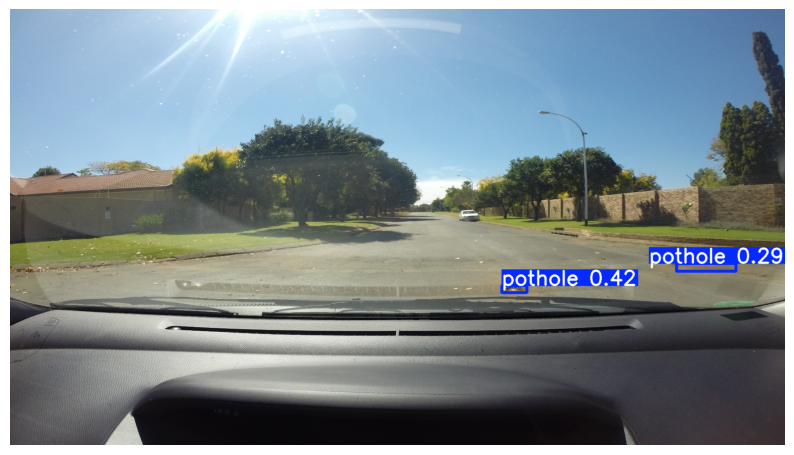

In [40]:

results = model("./valid/images/G0011989.jpg")
show_result(results)


image 1/1 /content/pothole_dataset_v8/pothole_dataset_v8/valid/images/img-139_jpg.rf.c8563e13a80d72f3d49a5678a2a1b6ea.jpg: 288x512 3 potholes, 17.8ms
Speed: 2.8ms preprocess, 17.8ms inference, 2.2ms postprocess per image at shape (1, 3, 288, 512)


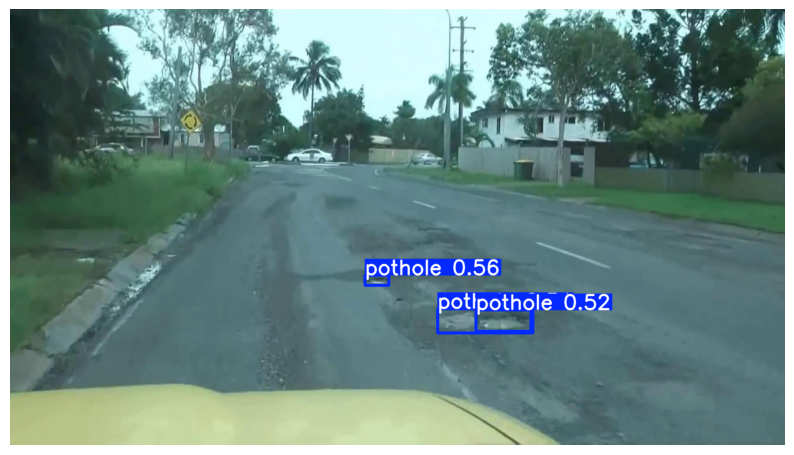

In [41]:
results = model("./valid/images/img-139_jpg.rf.c8563e13a80d72f3d49a5678a2a1b6ea.jpg")
show_result(results)

# references
- https://docs.ultralytics.com/ko/quickstart/
- https://xandroid.tistory.com/entry/yolo8-python-310-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EA%B0%9D%EC%B2%B4-%EC%9D%B8%EC%8B%9D-3-%EC%BB%A4%EC%8A%A4%ED%85%80-%EA%B0%90%EC%A7%80%ED%8F%AC%ED%8A%B8%ED%99%80